# Plotting of every Approximant I found useful to compare them

I have done this program on my first week using the program to see the differences between the approximants in a average binary BH system

In [59]:
import numpy as np 
import lalsimulation as lalsim 
import lal
import matplotlib.pyplot as plt
import time

The different parameters of the binary system

In [60]:
mass1 = 30 * lal.MSUN_SI # Mass of the first BH of GW150914 times the mass of the Sun in SI units
mass2 = 30 * lal.MSUN_SI # Mass of the second BH of GW150914 times the mass of the Sun in SI units

spin1x = 0.0 # x-component of Dimensionless Spin of the first BH
spin1y = 0.0 # y-component of Dimensionless Spin of the first BH
spin1z = 0.0 # z-component of Dimensionless Spin of the first BH
spin2x = 0.0 # x-component of Dimensionless Spin of the second BH
spin2y = 0.0 # y-component of Dimensionless Spin of the second BH
spin2z = 0.0 # z-component of Dimensionless Spin of the second BH

r = 410e6 * lal.PC_SI # Distance times the definition of a parsec in meters
inclination = 45.0 # Inclination angle of the binary system (iota)
phiRef = 0 # orbital phase at reference, half of main GW phase at reference
eccentricity=0.0 # eccentricity at reference epoch

delta_T = 1.0/16384.0               # series sampling interval
f_min = 15.0               # start frequency of inspiral
f_max = 250.0                # end frequency of inspiral: 0 means use default
f_ref = 00.0                # reference frequency: 0 means waveform end

We will restrict us to a Time-Domain waveform and its useful approximants

In [61]:
def Choose_Approximant(Approximant):
    with lal.no_swig_redirect_standard_output_error():
        # Generate the waveform
        hplus, hcross = lalsim.SimInspiralChooseTDWaveform(
        mass1, mass2, spin1x, spin1y, spin1z, spin2x, spin2y, spin2z, r, inclination, phiRef, 0.0, eccentricity, 0.0,
        delta_T, f_min, f_ref, None, lalsim.GetApproximantFromString(Approximant)
    )

    # Extract time series for both plus (h_plus) and cross (h_cross) polarizations
    h_plus = hplus.data.data
    h_cross = hcross.data.data 
    times = np.arange(len(h_plus)) * delta_T

    return h_plus, h_cross, times

In [62]:
List_Approximants=[]

List_Approximants.append("TaylorT2") # Time domain Taylor approximant in which the phase evolution φ(t) is obtained by iteratively solving post-Newtonian expansions φ(v) and t(v); 
List_Approximants.append("TaylorT4") # UNDOCUMENTED
List_Approximants.append("IMRPhenomB") # Time domain (non-precessing spins) inspiral-merger-ringdown waveforms generated from the inverse FFT of IMRPhenomFB. 
List_Approximants.append("IMRPhenomTHM") # Time domain, non-precessing phenomenological IMR waveform model for the dominant (2,2) and (2,-2) modes
List_Approximants.append("IMRPhenomTP") # Time domain, non-precessing phenomenological IMR waveform model with subdominant modes ([arXiv: 20XY.ZZZZZ]). 
List_Approximants.append("SEOBNRv4") # Spin nonprecessing EOBNR model v4. 

# THIS ONE DOES NOT WORK: List_Approximants.append("EccentricTD") # Time domain Taylor T4 approximant including orbital eccentricity effects.  


h_plus = []
h_cross = []
times = []

program_time=time.time()

for Approximant in List_Approximants:
    h_p ,h_c, t = Choose_Approximant(Approximant)
    h_plus.append(h_p)
    h_cross.append(h_c)
    times.append(t)
    print(f"El aproximante {Approximant} ha terminado. Ha tardado {time.time()-program_time} segundos")
    program_time=time.time()


El aproximante TaylorT2 ha terminado. Ha tardado 0.1140298843383789 segundos
El aproximante TaylorT4 ha terminado. Ha tardado 0.022185325622558594 segundos
El aproximante IMRPhenomB ha terminado. Ha tardado 0.015743255615234375 segundos
El aproximante IMRPhenomTHM ha terminado. Ha tardado 0.01983165740966797 segundos
El aproximante IMRPhenomTP ha terminado. Ha tardado 0.011609077453613281 segundos
El aproximante SEOBNRv4 ha terminado. Ha tardado 0.476276159286499 segundos


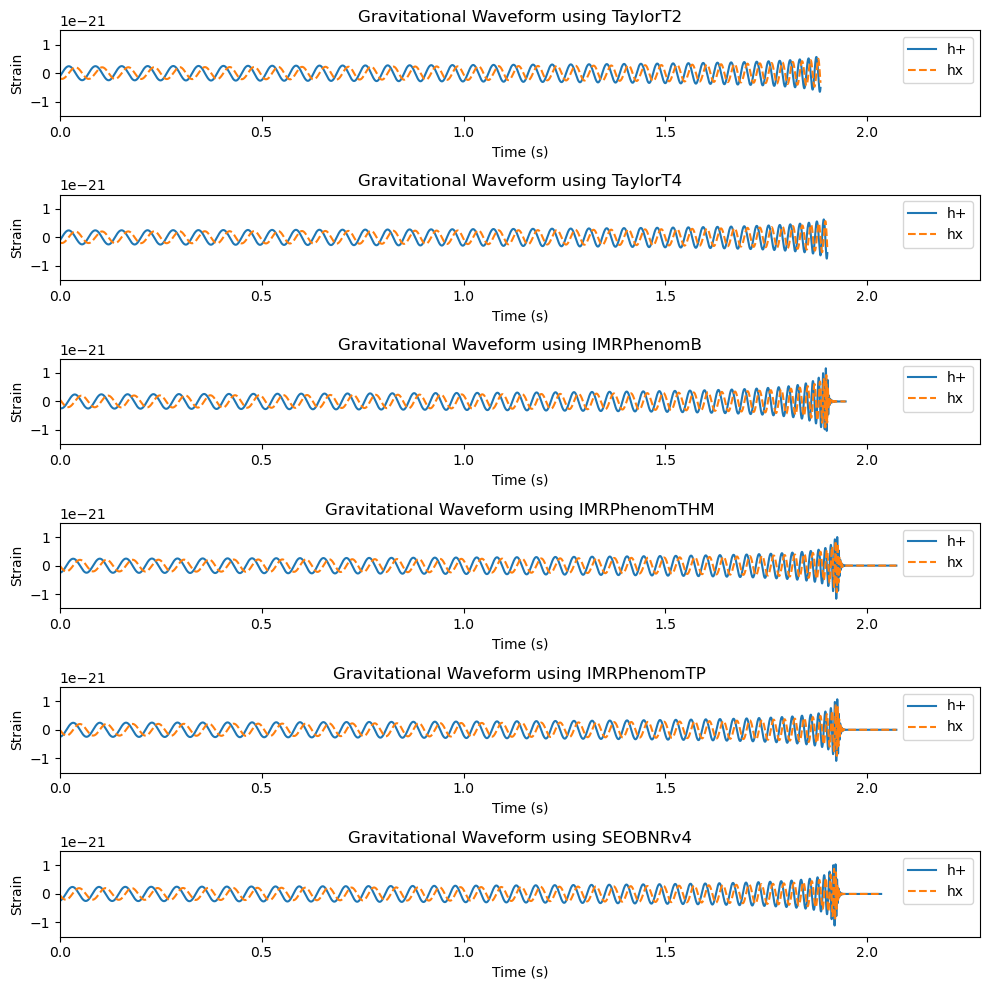

In [63]:
x_min = min(min(t) for t in times)  # Tiempo mínimo de todos los sets
x_max = max(max(t) for t in times)  # Tiempo máximo de todos los sets

# Plots of the strain of the waveform
plt.figure(figsize=(10, 10))

for n in range(len(List_Approximants)):

    plt.subplot(len(List_Approximants),1,n+1)
    plt.plot(times[n], h_plus[n], label='h+')
    plt.plot(times[n], h_cross[n], "--", label='hx',)
    plt.xlabel('Time (s)')
    plt.ylabel('Strain')
    plt.title(f'Gravitational Waveform using {List_Approximants[n]}')
    plt.legend()

    # Establecer límites de x e y en todas las gráficas
    plt.xlim(x_min, x_max+x_max/10)
    plt.ylim(-1.5*10**(-21), 1.5*10**(-21))

plt.tight_layout()    
plt.show()




### Spin

In [64]:
spin1x = 0.0 # x-component of Dimensionless Spin of the first BH
spin1y = 0.0 # y-component of Dimensionless Spin of the first BH
spin1z = 0.99 # z-component of Dimensionless Spin of the first BH
spin2x = 0.0 # x-component of Dimensionless Spin of the second BH
spin2y = 0.0 # y-component of Dimensionless Spin of the second BH
spin2z = 0.99 # z-component of Dimensionless Spin of the second BH

In [65]:
List_Spin_Approximants = []

List_Spin_Approximants.append("SpinTaylorT4") # Spinning case T4 models (lalsimulation's equivalent of SpinTaylorFrameless). 
List_Spin_Approximants.append("SEOBNRv4") # Spin nonprecessing EOBNR model v4. 
List_Spin_Approximants.append("SEOBNRv4P") # Spin precessing EOBNR model based on SEOBNRv4.
List_Spin_Approximants.append("IMRPhenomTPHM") # Time domain, precessing phenomenological IMR waveform model for L=2 sector 
# THIS ONE DOES NOT WORK: #List_Spin_Approximants.append("PhenSpinTaylor") # Inspiral part of the PhenSpinTaylorRD. 
                          #List_Spin_Approximants.append("PhenSpinTaylorRD") # Phenomenological waveforms, interpolating between a T4 spin-inspiral and the ringdown.  

h_plus = []
h_cross = []
times = []

program_time=time.time()

for Approximant in List_Spin_Approximants:
    h_p ,h_c, t = Choose_Approximant(Approximant)
    h_plus.append(h_p)
    h_cross.append(h_c)
    times.append(t)
    print(f"El aproximante {Approximant} ha terminado. Ha tardado {time.time()-program_time} segundos")
    program_time=time.time() 


El aproximante SpinTaylorT4 ha terminado. Ha tardado 0.015154123306274414 segundos
El aproximante SEOBNRv4 ha terminado. Ha tardado 0.5727639198303223 segundos
El aproximante SEOBNRv4P ha terminado. Ha tardado 1.1526844501495361 segundos
El aproximante IMRPhenomTPHM ha terminado. Ha tardado 0.01991891860961914 segundos


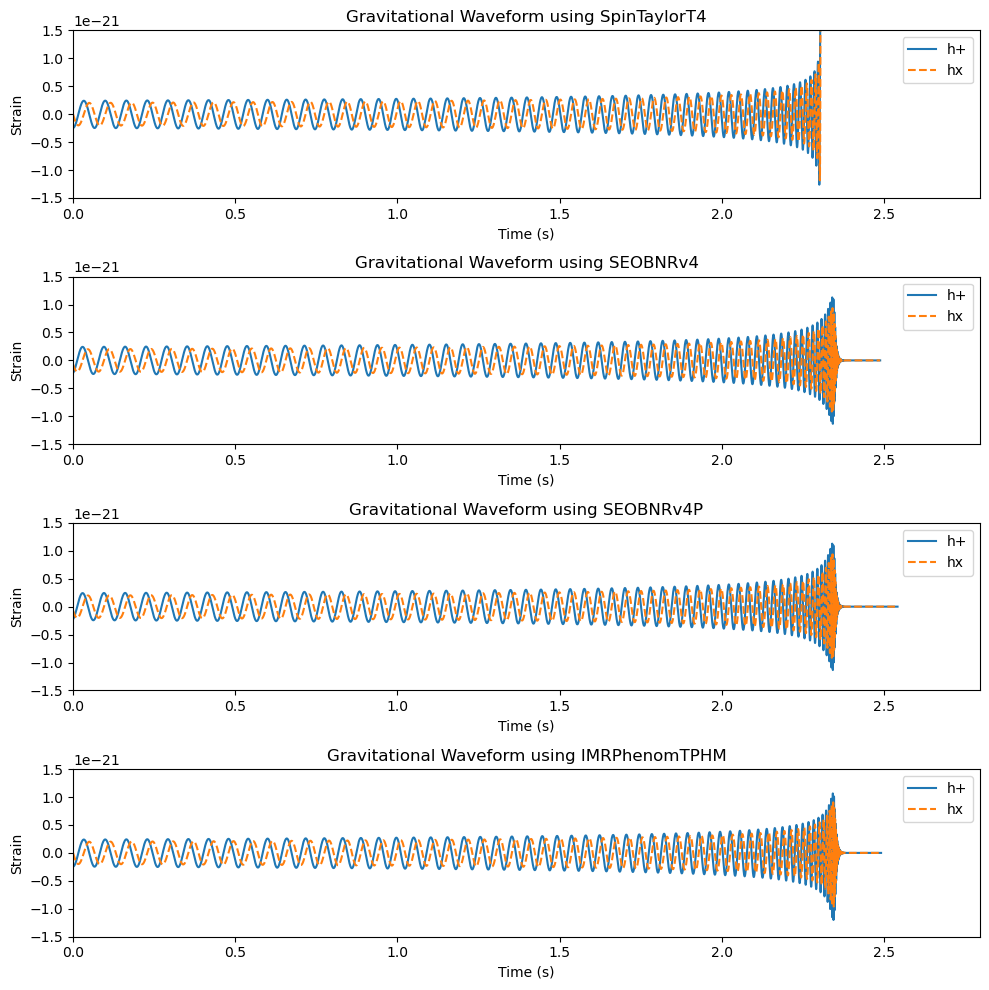

In [66]:
x_min = min(min(t) for t in times)  # Tiempo mínimo de todos los sets
x_max = max(max(t) for t in times)  # Tiempo máximo de todos los sets

# Plots of the strain of the waveform
plt.figure(figsize=(10, 10))

for n in range(len(List_Spin_Approximants)):

    plt.subplot(len(List_Spin_Approximants),1,n+1)
    plt.plot(times[n], h_plus[n], label='h+')
    plt.plot(times[n], h_cross[n], "--", label='hx',)
    plt.xlabel('Time (s)')
    plt.ylabel('Strain')
    plt.title(f'Gravitational Waveform using {List_Spin_Approximants[n]}')
    plt.legend()

    # Establecer límites de x e y en todas las gráficas
    plt.xlim(x_min, x_max+x_max/10)
    plt.ylim(-1.5*10**(-21), 1.5*10**(-21))

plt.tight_layout()    
plt.show()


### Spin Precessing

In [67]:
spin1x = 0.99 # x-component of Dimensionless Spin of the first BH
spin1y = 0.0 # y-component of Dimensionless Spin of the first BH
spin1z = 0.0 # z-component of Dimensionless Spin of the first BH
spin2x = 0.0 # x-component of Dimensionless Spin of the second BH
spin2y = 0.99 # y-component of Dimensionless Spin of the second BH
spin2z = 0.0 # z-component of Dimensionless Spin of the second BH

In [68]:
List_Prec_Approximants = []

List_Prec_Approximants.append("SpinTaylorT4") # Spinning case T4 models (lalsimulation's equivalent of SpinTaylorFrameless). 
List_Prec_Approximants.append("SEOBNRv4P") # Spin precessing EOBNR model based on SEOBNRv4.
List_Prec_Approximants.append("IMRPhenomTPHM") # Time domain, precessing phenomenological IMR waveform model for L=2 sector 
# THIS ONE DOES NOT WORK: #List_Spin_Approximants.append("PhenSpinTaylor") # Inspiral part of the PhenSpinTaylorRD. 
                          #List_Spin_Approximants.append("PhenSpinTaylorRD") # Phenomenological waveforms, interpolating between a T4 spin-inspiral and the ringdown.  

h_plus = []
h_cross = []
times = []

program_time=time.time()

for Approximant in List_Prec_Approximants:
    h_p ,h_c, t = Choose_Approximant(Approximant)
    h_plus.append(h_p)
    h_cross.append(h_c)
    times.append(t)
    print(f"El aproximante {Approximant} ha terminado. Ha tardado {time.time()-program_time} segundos")
    program_time=time.time() 

El aproximante SpinTaylorT4 ha terminado. Ha tardado 0.013814449310302734 segundos
El aproximante SEOBNRv4P ha terminado. Ha tardado 1.2821733951568604 segundos
El aproximante IMRPhenomTPHM ha terminado. Ha tardado 0.15380597114562988 segundos


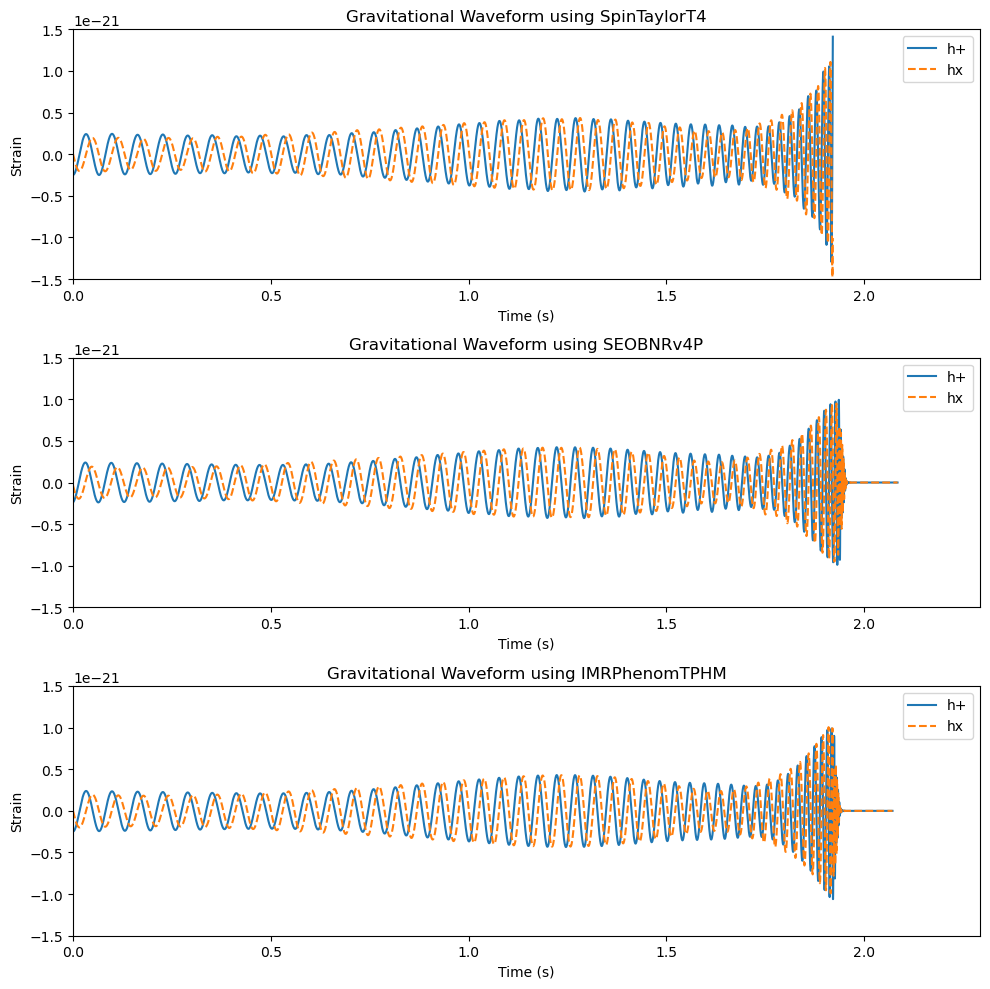

In [69]:
x_min = min(min(t) for t in times)  # Tiempo mínimo de todos los sets
x_max = max(max(t) for t in times)  # Tiempo máximo de todos los sets

# Plots of the strain of the waveform
plt.figure(figsize=(10, 10))

for n in range(len(List_Prec_Approximants)):

    plt.subplot(len(List_Prec_Approximants),1,n+1)
    plt.plot(times[n], h_plus[n], label='h+')
    plt.plot(times[n], h_cross[n], "--", label='hx',)
    plt.xlabel('Time (s)')
    plt.ylabel('Strain')
    plt.title(f'Gravitational Waveform using {List_Prec_Approximants[n]}')
    plt.legend()

    # Establecer límites de x e y en todas las gráficas
    plt.xlim(x_min, x_max+x_max/10)
    plt.ylim(-1.5*10**(-21), 1.5*10**(-21))

plt.tight_layout()    
plt.show()
